In [11]:
!pip install pandas matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import numpy as np
import os

def get_mnist():
    with np.load(f"{os.path.dirname(os.path.abspath('__file__'))}/data/mnist.npz") as f:
        images, labels = f["x_train"], f["y_train"]
    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = np.eye(10)[labels]
    return images, labels


In [13]:
images, labels = get_mnist()

w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer

In [46]:
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_i_h = np.zeros((20, 1))
b_h_o = np.zeros((10, 1))

learn_rate = 0.01
nr_correct = 0
epochs = 3

k_err = [0]

def train():
    global w_i_h, w_h_o, b_i_h, b_h_o, nr_correct, k_err
    for epoch in range(epochs):
        for index, (img, l) in enumerate(zip(images, labels)):

            img.shape += (1,)
            l.shape += (1,)

            # Forward propagation input -> hidden
            h_pre = b_i_h + w_i_h @ img
            h = 1 / (1 + np.exp(-h_pre))
            
            # Forward propagation hidden -> output
            o_pre = b_h_o + w_h_o @ h
            o = 1 / (1 + np.exp(-o_pre))

            # Cost / Error calculation
            e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
            if np.argmax(o) != np.argmax(l):
                k_err[-1] += 1
                if(index % 100 == 0):
                    k_err.append(1)
                # print(f"Index: {index}, Label: {np.argmax(l)}")
                # print(f"Error: {e}")
                # print(f"Prediction: {np.argmax(o)}")
                # print(f"Output: {o}")
            nr_correct += int(np.argmax(o) == np.argmax(l))

            # Backpropagation output -> hidden (cost function derivative)
            delta_o = o - l
            w_h_o += -learn_rate * delta_o @ np.transpose(h)
            b_h_o += -learn_rate * delta_o
            # Backpropagation hidden -> input (activation function derivative)
            delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
            w_i_h += -learn_rate * delta_h @ np.transpose(img)
            b_i_h += -learn_rate * delta_h

        # Show accuracy for this epoch
        print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
        nr_correct = 0


Acc: 93.19%
[809, 517, 376, 1029, 1826, 330, 690, 712, 288, 2384, 1571, 497, 520, 3457, 858, 1764]


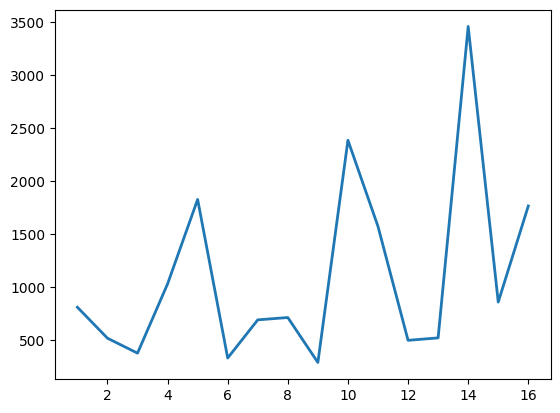

In [49]:
import matplotlib.pyplot as plt
train()

y = k_err
print(y)
x = [i for i in range(1, len(k_err) + 1)]


# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))



plt.show()

In [33]:
import matplotlib.pyplot as plt

def test_prediction():
  index = int(input("Enter a number (0 - 59999): "))
  img = images[index]
  print(img.shape)
  plt.imshow(img.reshape(28, 28), cmap="Greys")

  img.shape += (1,)
  # Forward propagation input -> hidden
  h_pre = b_i_h + w_i_h @ img.reshape(784, 1)

  h = 1 / (1 + np.exp(-h_pre))

  # Forward propagation hidden -> output
  o_pre = b_h_o + w_h_o @ h
  o = 1 / (1 + np.exp(-o_pre))


  plt.title(f"Index: {index} \nLabel: {labels[index].argmax()} \nPrediction: {o.argmax()}")
  plt.show()

(784,)


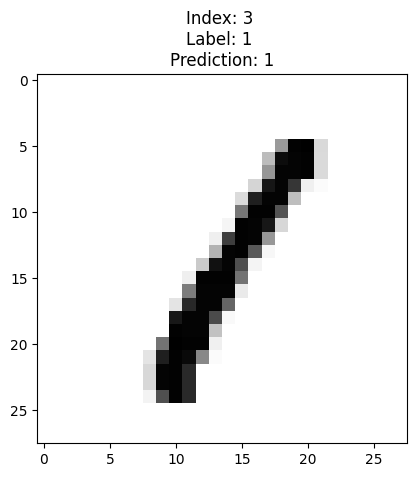

In [31]:
test_prediction()

In [40]:
train()

Index: 1, Label: 0
Error: [0.27965968]
Prediction: 5
Index: 2, Label: 4
Error: [0.28699001]
Prediction: 5
Index: 3, Label: 1
Error: [0.25117692]
Prediction: 5
Index: 4, Label: 9
Error: [0.3172665]
Prediction: 1
Index: 5, Label: 2
Error: [0.30691436]
Prediction: 5
Index: 6, Label: 1
Error: [0.27410356]
Prediction: 4
Index: 7, Label: 3
Error: [0.26715738]
Prediction: 5
Index: 8, Label: 1
Error: [0.24506289]
Prediction: 4
Index: 9, Label: 4
Error: [0.22067442]
Prediction: 1
Index: 10, Label: 3
Error: [0.28170921]
Prediction: 5
Index: 12, Label: 3
Error: [0.24320756]
Prediction: 5
Index: 13, Label: 6
Error: [0.26243145]
Prediction: 5
Index: 14, Label: 1
Error: [0.20712962]
Prediction: 4
Index: 15, Label: 7
Error: [0.18725305]
Prediction: 1
Index: 16, Label: 2
Error: [0.26457331]
Prediction: 5
Index: 17, Label: 8
Error: [0.25289076]
Prediction: 5
Index: 18, Label: 6
Error: [0.20018976]
Prediction: 5
Index: 19, Label: 9
Error: [0.21338748]
Prediction: 4
Index: 20, Label: 4
Error: [0.20233921

KeyboardInterrupt: 

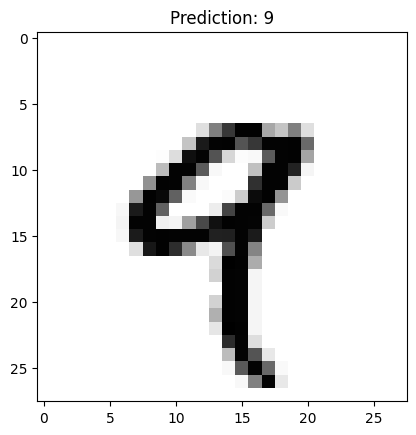

In [27]:
test_prediction()